In [7]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join("..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scripts.eda_utils import *

sns.set(style="whitegrid")

In [9]:
import scripts.eda_utils as eda
import scripts.csv_utils as csv

In [10]:
data_path = "../Data/data.csv"
df = csv.load_csv(data_path)
df.head()

c:\Users\dagiM\Desktop\Kifiya\Week 3\Insurance Risk Analytics & Predictive Modeling\scripts\csv_utils.py:16: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Data loaded successfully from ../Data/data.csv. Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0


In [11]:
print("Dataset Shape:", df.shape)
df.info()
df.describe(include='all')
df.isnull().sum().sort_values(ascending=False)

Dataset Shape: (1000098, 52)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
make                            552
mmcode                          552
Model                           552
Cylinders                       552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
VehicleIntroDate                552
cubiccapacity                   552
CapitalOutstanding                2
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

### Clean & Format Columns

In [12]:
df = df[df['Gender'].isin(['Male', 'Female'])].copy()

In [13]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

###  Descriptive Stats

In [14]:
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'LossRatio']
describe_numerics(df, numerical_cols)


Descriptive Statistics:



c:\Users\dagiM\Desktop\Kifiya\Week 3\Insurance Risk Analytics & Predictive Modeling\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
TotalPremium,49572.0,3.801790e+01,121.958935,-782.576754,0.0,0.0,5.476842,1.028580e+03
TotalClaims,49572.0,3.322343e+01,1362.919018,0.000000,0.0,0.0,0.000000,1.938610e+05
CustomValueEstimate,4125.0,2.108370e+05,98427.257976,46000.000000,120000.0,199000.0,280000.000000,4.236420e+05
LossRatio,22738.0,inf,NaN,0.000000,0.0,0.0,0.000000,inf


### Grouped Loss Ratio by Province, VehicleType, Gender

In [15]:
loss_by_group = df.groupby(['Province', 'VehicleType', 'Gender'])['LossRatio'].mean().reset_index()
print(loss_by_group.head())

        Province        VehicleType  Gender  LossRatio
0        Gauteng  Medium Commercial    Male   1.173402
1        Gauteng  Passenger Vehicle  Female   0.778617
2        Gauteng  Passenger Vehicle    Male        inf
3  KwaZulu-Natal  Medium Commercial  Female   0.108812
4  KwaZulu-Natal  Passenger Vehicle  Female        inf


### Outlier Detection - Boxplots

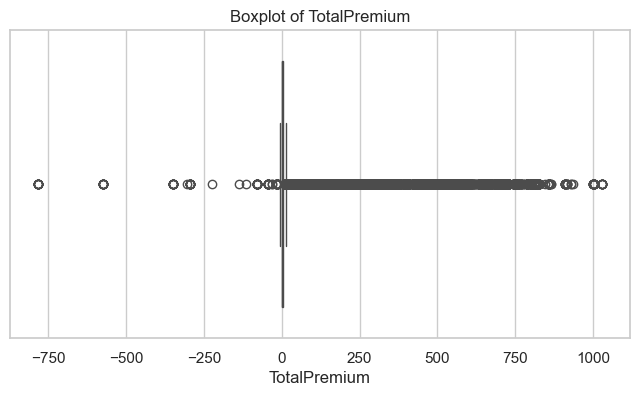

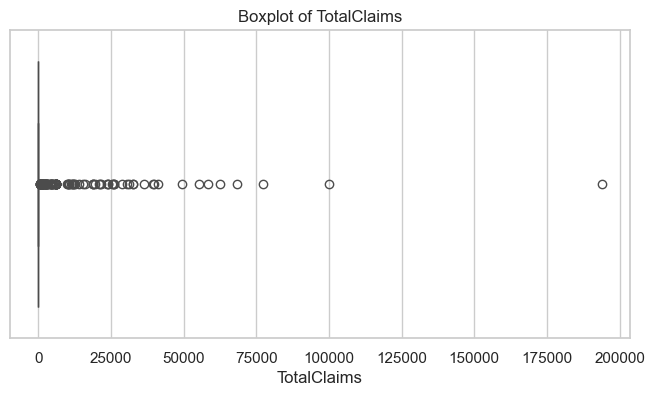

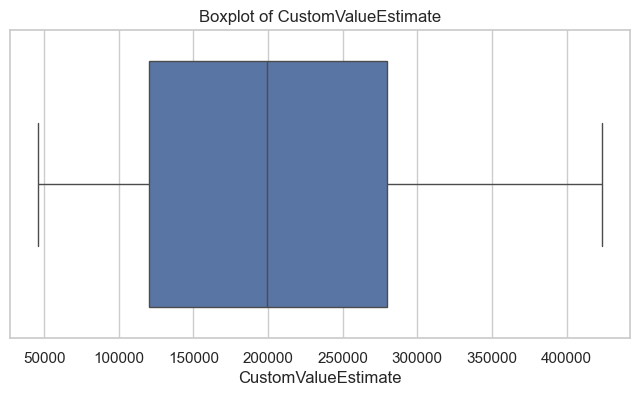

In [16]:
plot_boxplots(df, ['TotalPremium', 'TotalClaims', 'CustomValueEstimate'])

### Distribution Plots

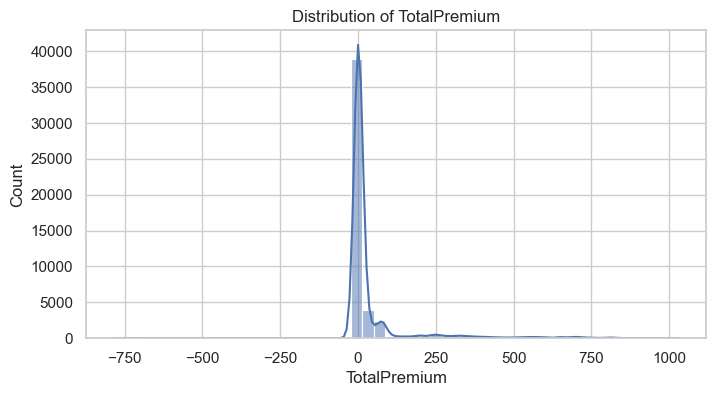

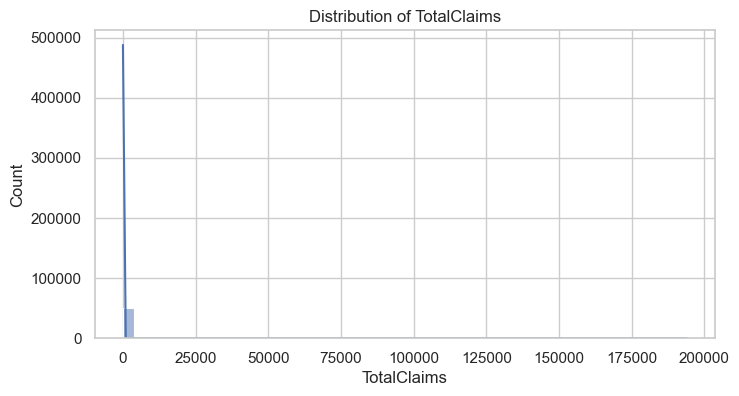

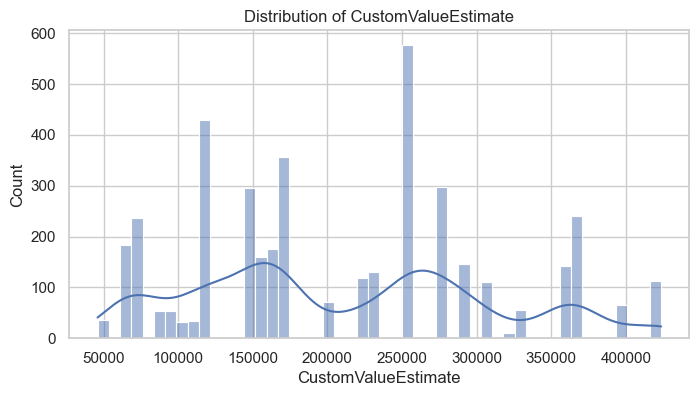

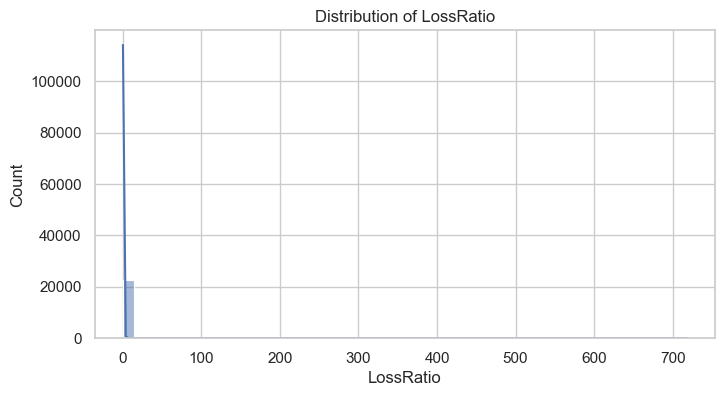

In [17]:
plot_distributions(df, numerical_cols)

### Correlation Matrix

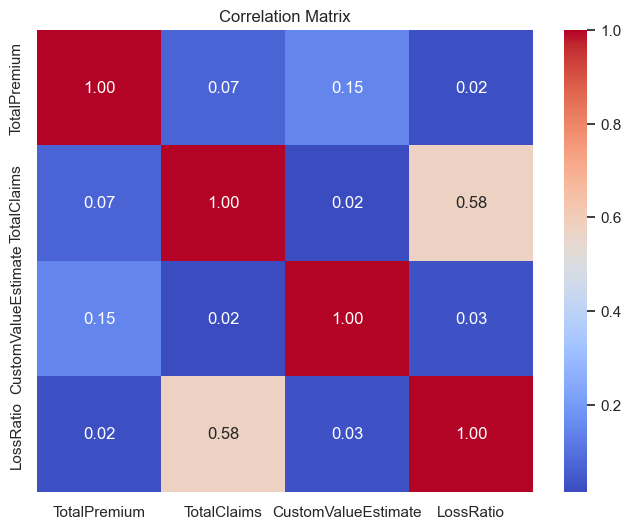

In [18]:
plot_correlation_matrix(df, numerical_cols)

### Trend Over Time

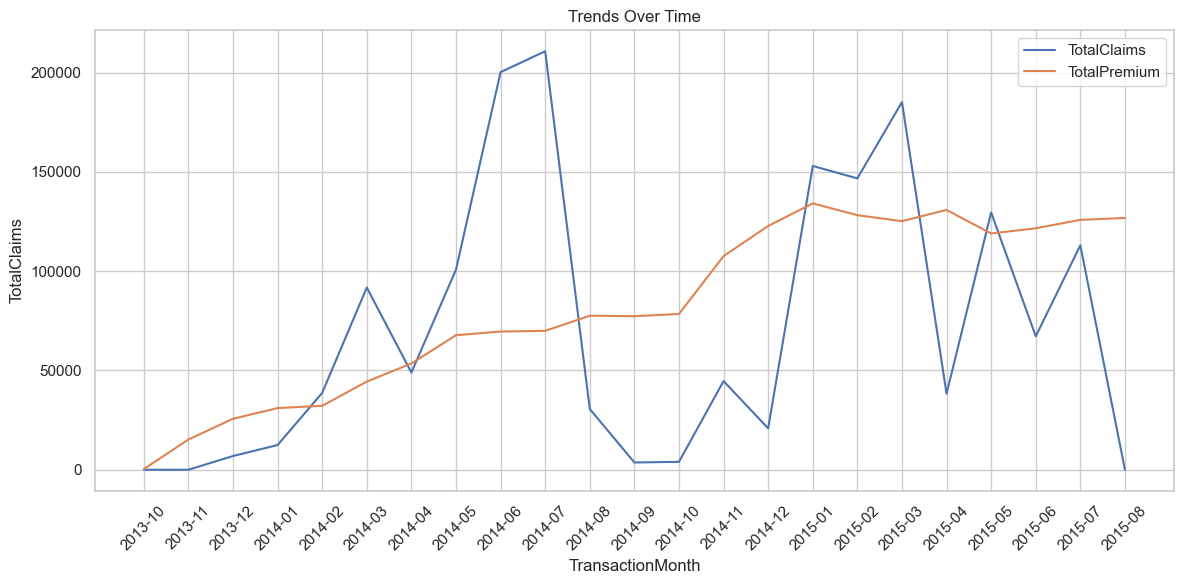

In [19]:
monthly_summary = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({'TotalClaims': 'sum', 'TotalPremium': 'sum'}).reset_index()
monthly_summary['TransactionMonth'] = monthly_summary['TransactionMonth'].astype(str)
plot_time_series(monthly_summary, 'TransactionMonth', ['TotalClaims', 'TotalPremium'])

Claims by Make and Model

In [20]:
top_claims, low_claims = analyze_vehicle_claims(df)
print("Top 10 Vehicles by Average Claims:\n", top_claims)
print("Lowest 10 Vehicles by Average Claims:\n", low_claims)

Top 10 Vehicles by Average Claims:
 make           Model                         
AUDI           A4 1.8T S AVANT MULTITRONIC       1073.760714
TOYOTA         ETIOS 1.5 Xs                       342.743902
AUDI           A4 2.0 TDI S  MULTITRONIC          140.590000
TOYOTA         HiACE SIYAYA                       132.805070
VOLKSWAGEN     CRAFTER 50 HR 120 F/C P/V           83.243421
SAIC           MAXUS 2.5TD 16 SEAT                 66.670588
TOYOTA         HiACE SUPER 16 F/Lift               57.377173
MERCEDES-BENZ  VITO 115 CDI CREWBUS                49.800643
TOYOTA         QUANTUM 2.5 D-4D SESFIKILE 16s      43.293419
               QUANTUM 2.7 SESFIKILE 15s           39.348412
Name: TotalClaims, dtype: float64
Lowest 10 Vehicles by Average Claims:
 make                                 Model                  
B.A.W                                SASUKA 2.7i (16 SEAT)      0.0
BMW                                  320i START (E90)           0.0
                                     3

### Visualizations

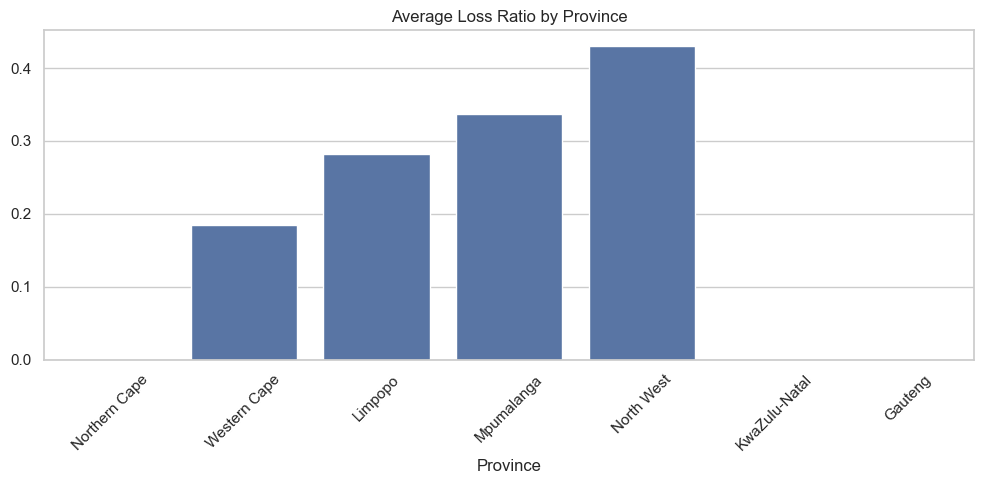

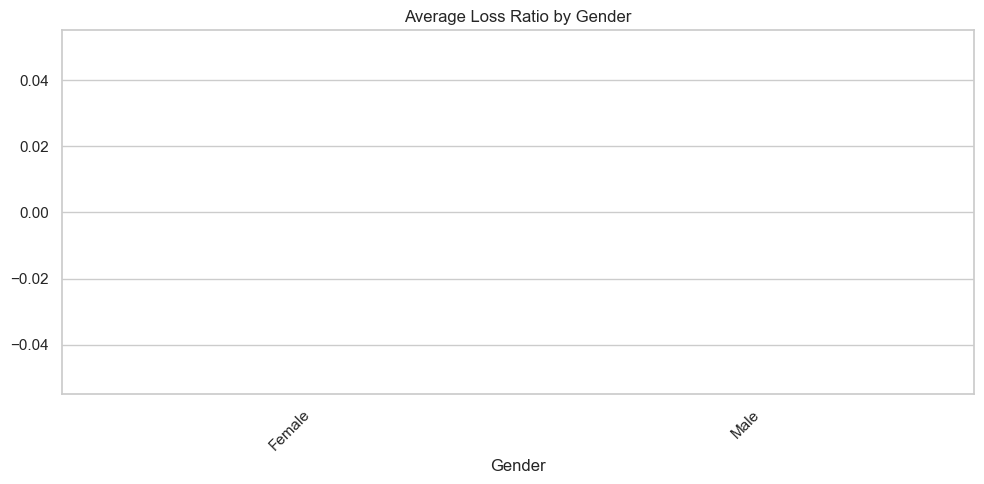

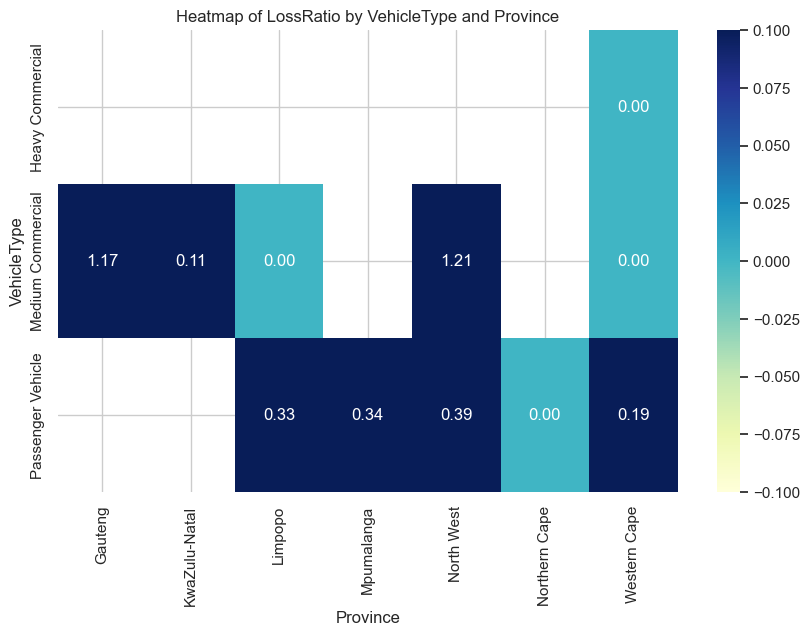

In [22]:
plot_avg_loss_by_category(df, 'Province')
plot_avg_loss_by_category(df, 'Gender')
plot_heatmap(df, 'VehicleType', 'Province', 'LossRatio')